In [97]:
import pickle
from matplotlib import pyplot as plt
import wfdb
# read pickle files and check len and print first record and first record keys

#path = "C:/Studium/dsa/data"
path = "C:/Users/Nils/Documents/HS-Mannheim/0000_MASTER/DSA/EKG_Prog/data"

categories_dict = {
'SB':    [426177001],
'AFIB':  [164889003, 164890007],
'GSVT':  [426761007, 713422000, 233896004, 233897008, 713422000],
'SR':    [426783006, 427393009]
}


data = {}
for cat_name in categories_dict.keys():
    print(f"Reading {cat_name}")
    with open(f'{path}/{cat_name}.pkl', 'rb') as f:
        records = pickle.load(f)
        data[cat_name] = records
        print(f"Length of {cat_name}: {len(records)}")

Reading SB
Length of SB: 228
Reading AFIB
Length of AFIB: 111
Reading GSVT
Length of GSVT: 0
Reading SR
Length of SR: 65


In [98]:
# print keys of first record
print(f"Keys of first record of SB: {data['SB'][0].__dict__.keys()}")

counter_p = 0
counter_e_p = 0
counter_d = 0
counter_e_d = 0
for record in data['SR']:
    if record.p_signal is not None:
        counter_p += 1
    if record.e_p_signal is not None:
        counter_e_p += 1
    if record.d_signal is not None:
        counter_d += 1

print(f"Number of records with p_signal: {counter_p}")
print(f"Number of records with e_p_signal: {counter_e_p}")
print(f"Number of records with d_signal: {counter_d}")
print(f"Number of records with e_d_signal: {counter_e_d}")


print(data['SB'][0].__dict__)
print(data['SB'][0].__dict__['p_signal'].shape)

Keys of first record of SB: dict_keys(['record_name', 'n_sig', 'fs', 'counter_freq', 'base_counter', 'sig_len', 'base_time', 'base_date', 'comments', 'sig_name', 'p_signal', 'd_signal', 'e_p_signal', 'e_d_signal', 'file_name', 'fmt', 'samps_per_frame', 'skew', 'byte_offset', 'adc_gain', 'baseline', 'units', 'adc_res', 'adc_zero', 'init_value', 'checksum', 'block_size'])
Number of records with p_signal: 65
Number of records with e_p_signal: 0
Number of records with d_signal: 0
Number of records with e_d_signal: 0
{'record_name': 'JS00002', 'n_sig': 12, 'fs': 500, 'counter_freq': None, 'base_counter': None, 'sig_len': 5000, 'base_time': None, 'base_date': None, 'comments': ['Age: 59', 'Sex: Female', 'Dx: 426177001,164934002', 'Rx: Unknown', 'Hx: Unknown', 'Sx: Unknown'], 'sig_name': ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'], 'p_signal': array([[-0.01 ,  0.01 ,  0.02 , ...,  0.054,  0.049,  0.   ],
       [-0.024, -0.02 ,  0.005, ...,  0.034,  0.034, -0.0

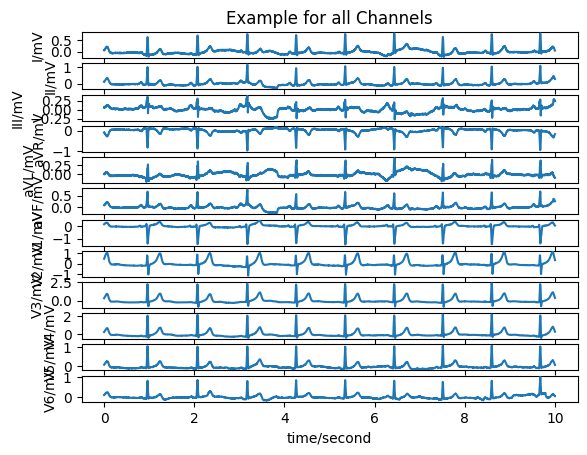

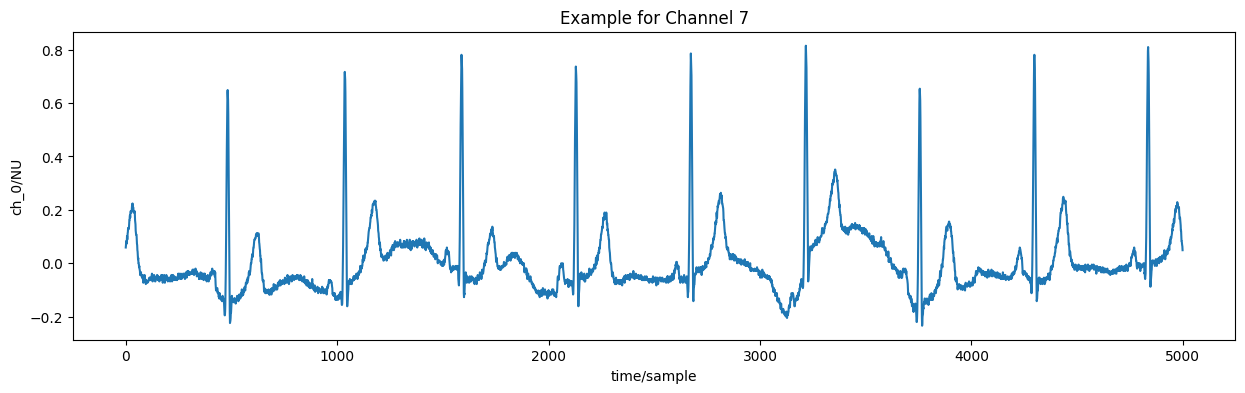

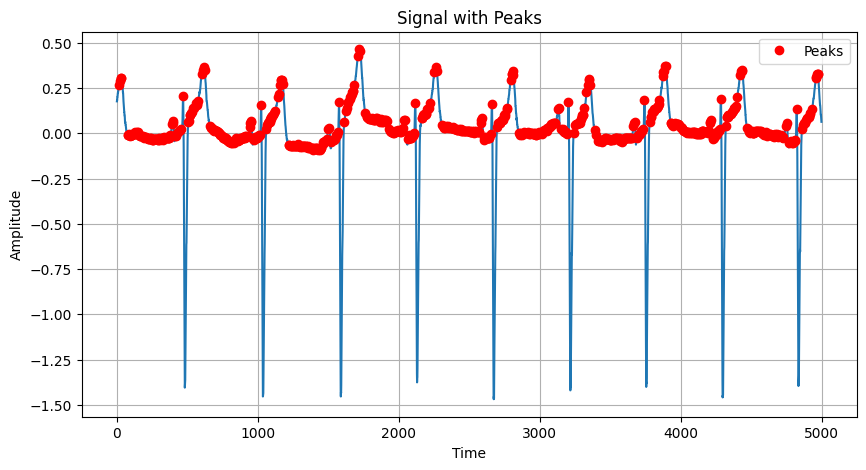

In [99]:
# Get one of the 12 signals ploted

# channel6 = data['SB'][44].__dict__['p_signal'][:,4].reshape(5000,1)
# fig,ax = plt.subplots()
# ax.plot_wfdb(channel6)
# ax.set_title('ECG P-Signal of Channel 5')
# fig.set_size_inches(15,4)
# plt.show()

#Plot a complete Record
import wfdb.processing


wfdb.plot_wfdb(data['SB'][24],title="Example for all Channels")
#Plot specific Channel of Record
fig = wfdb.plot_items(data['SB'][24].p_signal[:,0],title="Example for Channel 7",figsize=(15,4),return_fig=True)

#Find peaks in Channel 6 of Record 25
hard = wfdb.processing.find_local_peaks(data['SB'][24].p_signal[:,6],radius=3)
record = data['SB'][24].p_signal[:,6]
wholeRecord = data['SB'][24]
peak_points_y = [record[i] for i in hard] 

plt.figure(figsize=(10, 5))
plt.plot(record)
plt.plot(hard, peak_points_y, 'ro', label='Peaks')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Signal with Peaks')
plt.legend()
plt.grid(True)
plt.show()

In [100]:
# Daten Normalisieren durch qrs peaks auf index position 0 setzen ("X-Achsen Normalisierung")

indicies = wfdb.processing.xqrs_detect(wholeRecord.p_signal[:,6],wholeRecord.fs,0,5000)
print(indicies)

Learning initial signal parameters...
Failed to find 8 beats during learning.
Initializing using default parameters
Running QRS detection...
QRS detection complete.
[ 484 1038 1590 2131 2675 3219 3758 4300 4838]


[0.059 0.068 0.083 ... 0.068 0.063 0.049]
[0.27931363 0.28789323 0.30219256 ... 0.28789323 0.28312679 0.26978074]


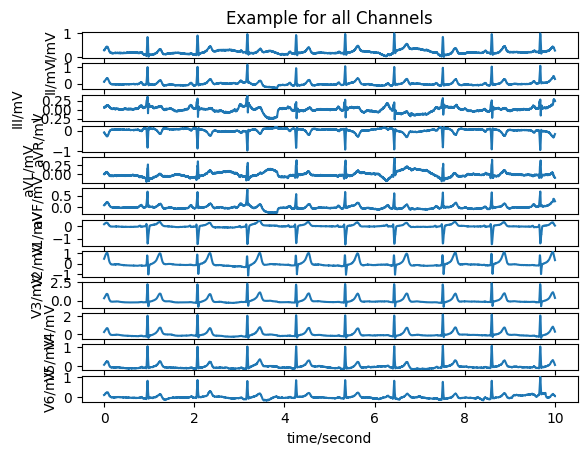

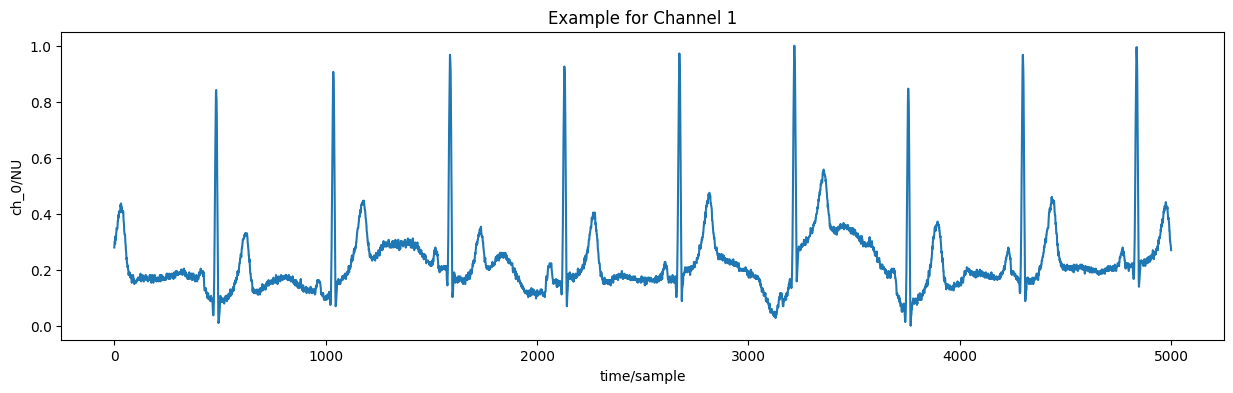

In [101]:
# Normalisieren durch upper sowie Lower Bounds ("Y-Achsen Normalisierung")
print(wholeRecord.p_signal[:,0])
wholeRecord.p_signal[:,0] = wfdb.processing.normalize_bound(wholeRecord.p_signal[:,0],0,1)
print(wholeRecord.p_signal[:,0])
wfdb.plot_wfdb(wholeRecord,title="Example for all Channels")
wfdb.plot_items(data['SB'][24].p_signal[:,0],title="Example for Channel 1",figsize=(15,4))
